In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = pd.DataFrame([[1,4], [1,3], [0,4], [5,1], [6,2], [4,0]], columns = ['x1', 'x2'])
n, k = X.shape

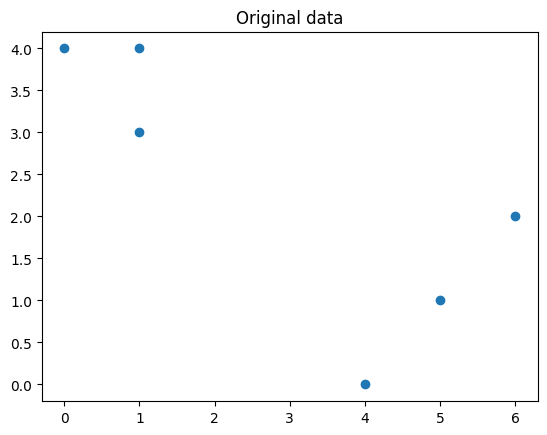

In [8]:
# (a)
plt.figure()
plt.scatter(X['x1'], X['x2'])
plt.title('Original data')
plt.show()

In [5]:
# (b)
cluster_labels = [0, 1]
np.random.seed(0)
clusters = np.random.choice(cluster_labels, size=n, replace=True)
print('Initial cluster assignment:', clusters)

Initial cluster assignment: [0 1 1 0 1 1]


In [6]:
# (c), (d), (e)
clusters_prev = np.empty((2,))
i=0
while not np.array_equal(clusters_prev, clusters):
    i += 1
    print('=== Iteration', i, '===')
    centroids = pd.DataFrame([X[clusters==0].mean(axis=0), X[clusters==1]. mean(axis=0)])
    print('Centroids:', centroids)
    
    dist0 = np.linalg.norm(X - centroids.loc[0], axis=1)
    dist1 = np.linalg.norm(X - centroids.loc[1], axis=1)
    clusters_prev = clusters
    clusters = np.array(1*(dist1 <= dist0))
    print('Clusters:', clusters)

=== Iteration 1 ===
Centroids:      x1    x2
0  3.00  2.50
1  2.75  2.25
Clusters: [1 1 1 0 0 1]
=== Iteration 2 ===
Centroids:     x1    x2
0  5.5  1.50
1  1.5  2.75
Clusters: [1 1 1 0 0 0]
=== Iteration 3 ===
Centroids:          x1        x2
0  5.000000  1.000000
1  0.666667  3.666667
Clusters: [1 1 1 0 0 0]


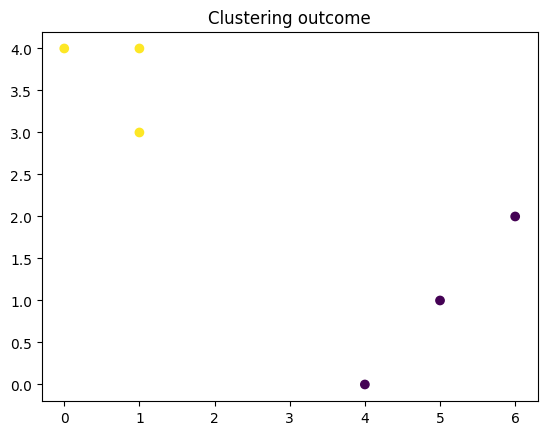

In [7]:
plt.figure()
plt.scatter(X['x1'], X['x2'], c=clusters)
plt.title('Clustering outcome')
plt.show()